In [1]:
%matplotlib inline
import pandas as pd
import matplotlib
import numpy as np
import numpy.linalg as LA
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import sklearn
from sklearn.manifold import TSNE
import Utils.TaggedRowVecs as trv
import Utils.BuildMatrix as bm
import Utils.MatrixPlot as mp
np.core.arrayprint._line_width = 160

In [2]:
import sys
sys.version_info

sys.version_info(major=3, minor=5, micro=4, releaselevel='final', serial=0)

In [3]:
plt.rcParams['figure.figsize'] = (8,4)

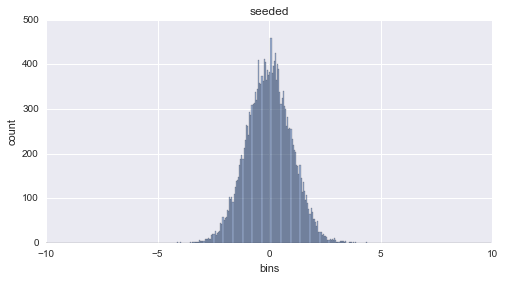

In [4]:
rng = np.random.RandomState(133)
bins = np.arange(-10, 10, 0.05) # fixed bin size
plt.hist(rng.randn(20000), bins=bins, alpha=0.5)
plt.title('seeded')
plt.xlabel('bins')
plt.ylabel('count')
plt.show()

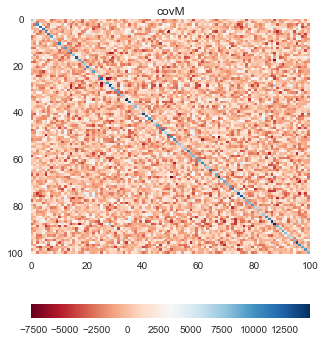

In [5]:
seed = 333
dim = 100; count=1000
rng = np.random.RandomState(seed)
pts = np.hstack(rng.randn(dim, count) + (rng.randn(dim)[:, np.newaxis] * 100) for i in range(30))
covM = np.cov(pts)
covM
mp.plotOneMatrix(covM, "covM", width=5, height=6)

In [6]:
dimA = 100
stdDev = .2
numClusters = 50
numPoints = 50

In [7]:
q = trv.Gaussians(dim=dimA, num_points=numClusters)
tcvG = trv.Gaussians(centers=q,
                     num_points=numPoints,
                     covMatrix=np.matrix(np.diag([stdDev] * dimA)))

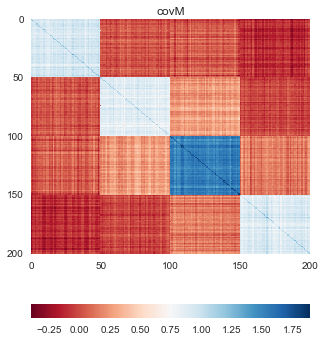

In [8]:
covM = np.cov(tcvG.row_vecs[:200, :200])
covM
mp.plotOneMatrix(covM, "covM", width=5, height=6)

In [9]:
from sklearn.datasets import load_digits

In [10]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [47]:
d0=digits.data[0]
d1=digits.data[1]
bm.cosSim(d0,d1), bm.pearsSim(d0,d1), bm.ecludSim(d0,d1)

(0.75955117132073435, 0.59975962438830288, 0.016513450557617704)

In [13]:
ddd = [(i, digits.data[digits.target==i]) for i in range(10)]
svdd = [(i, np.linalg.svd(ddd[i][1])) for i in range(10)]

In [25]:
u3 = svdd[8][1][0]; s3 = svdd[8][1][1]; v3 = svdd[8][1][2]

def wank(a, default):
    if a <= 0 or a > 0.5:
        return default
    return max(-7., np.log(np.abs(a)))

big_wank = np.vectorize(wank)
wank_out = big_wank(u3, -7.)
mp.plotOneMatrix(wank_out[:, :], width=18, height=20)

In [45]:
[np.dot(u, u3[1, :]) for u in u3[:, :]]

[-1.0408340855860843e-17,
 1.0000000000000002,
 1.5851035761738075e-16,
 -2.7755575615628914e-17,
 6.3398722036089872e-17,
 -6.4184768611141862e-17,
 1.7347234759768071e-17,
 -4.0522056196645728e-17,
 5.6378512969246231e-18,
 -9.7361355089198298e-17,
 7.8929918156944723e-17,
 6.3967928176644762e-17,
 -1.2490009027033011e-16,
 -1.214306433183765e-17,
 -6.8087896432089678e-17,
 -1.9418060909215384e-16,
 2.6020852139652106e-18,
 5.7679555576228836e-17,
 -3.4694469519536142e-17,
 -5.377642775528102e-17,
 5.2041704279304213e-18,
 -1.0408340855860843e-16,
 3.2959746043559335e-17,
 -8.4350929019372245e-17,
 -2.6020852139652106e-17,
 1.1492543028346347e-17,
 4.9873299934333204e-17,
 6.4726869697384615e-17,
 -5.1174342541315809e-17,
 -2.6454533008646308e-17,
 -6.1582683397176652e-17,
 1.1709383462843448e-17,
 7.3671537620390026e-17,
 2.6020852139652106e-18,
 1.0213184464813452e-16,
 -3.8163916471489756e-17,
 -6.4835289914633165e-17,
 -6.6786853825107073e-17,
 -3.6862873864507151e-17,
 1.3687374

In [89]:
clip = 16
reconstimg = np.matrix(u3[:, :clip]) * np.diag(s3[:clip]) * np.matrix(v3[:clip, :])

In [90]:
reconA = np.asarray(reconstimg)
reconAA = reconA.reshape(174,8,8)
reconAA.shape

(174, 8, 8)

In [91]:
orig8s = ddd[8][1]

In [92]:
dex = 11
d8 = orig8s[dex]
r8 = reconA[dex]
bm.cosSim(d8,r8), bm.pearsSim(d8, r8), bm.ecludSim(d8,r8)

(0.98841399353381343, 0.9817022883788622, 0.078003324684765743)

In [93]:
[k for k in zip(d8, r8)]

[(0.0, -9.7115191261522587e-17),
 (0.0, -0.10455128075151812),
 (5.0, 5.5695425333655164),
 (4.0, 9.499258730961726),
 (9.0, 11.553198386281304),
 (10.0, 9.3560298699243098),
 (0.0, 0.2257717419095184),
 (0.0, 8.6850583860555148e-17),
 (0.0, -0.12473393487228109),
 (0.0, -0.63851267246264887),
 (10.0, 11.336224807187103),
 (8.0, 12.181735423762539),
 (11.0, 9.207186890959683),
 (16.0, 16.039130701812098),
 (2.0, 2.1759017383839407),
 (0.0, -5.7592868022234876e-15),
 (0.0, -0.024487903963209896),
 (0.0, -1.5374177745564528),
 (8.0, 8.2812480500977586),
 (12.0, 10.591852248334082),
 (14.0, 12.866777241284824),
 (14.0, 10.128620133957638),
 (1.0, -0.34308145617696473),
 (0.0, 7.4910857259777104e-16),
 (0.0, 3.3353595191690008e-16),
 (0.0, -0.065453220531511216),
 (5.0, 5.237322806990437),
 (15.0, 12.623796295171825),
 (7.0, 9.2465927943968929),
 (0.0, -0.86039624373766788),
 (0.0, 0.10864510377203815),
 (0.0, -1.9532123171000998e-19),
 (0.0, 2.2551385429061401e-18),
 (0.0, 2.6174870381779

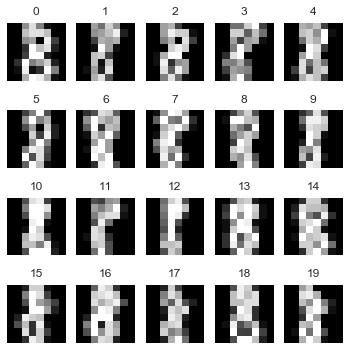

In [59]:
nrows, ncols = 4, 5
plt.figure(figsize=(6,6))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(reconAA[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(i)